In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 44kB/s 


In [2]:
!nvidia-smi

Tue Mar  2 14:16:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [4]:
import zipfile 
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (3).zip", "r")
zip_ref.extractall("files")
zip_ref.close()

In [5]:
"""directory="/content/files/CK+48"
classes=["0","1","2","3","4"]
#"anger", "fear","happy","sadness","surprise"
for categories in classes:
  path=os.path.join(directory, categories)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break"""

'directory="/content/files/CK+48"\nclasses=["0","1","2","3","4"]\n#"anger", "fear","happy","sadness","surprise"\nfor categories in classes:\n  path=os.path.join(directory, categories)\n  for img in os.listdir(path):\n    img_array=cv2.imread(os.path.join(path,img))\n    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))\n    plt.show()\n    break\n  break'

In [6]:
img_size=227
"""new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()"""

'new_array=cv2.resize(img_array,(img_size,img_size))\nplt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))\nplt.show()'

In [7]:
"new_array.shape"

'new_array.shape'

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
data=[]
labels=[]
directory="/content/files/CK+48"
classes=["0","1","2","3","4"]
for category in classes:
  path=os.path.join(directory, category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    new_array=cv2.resize(img_array,(img_size,img_size))
    data.append(new_array)
    labels.append(category)


lb = LabelBinarizer()
labels = lb.fit_transform(labels)


print(len(data))

750


In [9]:
data=np.array(data).reshape(-1,img_size,img_size,3) #converting into 4 dimension

In [10]:
data.shape

(750, 227, 227, 3)

In [11]:
data=data/255.0

In [12]:
labels[0]

array([1, 0, 0, 0, 0])

In [13]:
labels=np.array(labels)

In [14]:
labels.shape

(750, 5)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(5))
model.add(Activation('softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('AlexNet-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only = True,
                             mode = 'auto')
history = model.fit(data, labels, epochs = 40, callbacks = [checkpoint], validation_split=0.2)

Epoch 1/40
19/19 [==============================] - 79s 4s/step - loss: 2.3500 - accuracy: 0.3400 - val_loss: 390.4289 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: AlexNet-001.model/assets
Epoch 2/40
19/19 [==============================] - 78s 4s/step - loss: 1.3662 - accuracy: 0.5626 - val_loss: 280.5867 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: AlexNet-002.model/assets
Epoch 3/40
19/19 [==============================] - 77s 4s/step - loss: 1.1657 - accuracy: 0.6061 - val_loss: 122.6737 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: AlexNet-003.model/assets
Epoch 4/40
19/19 [==============================] - 77s 4s/step - loss: 0.9479 - accuracy: 0.6911 - val_loss: 46.9660 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: AlexNet-004.model/assets
Epoch 5/40
19/19 [==============================] - 77s 4s/step - loss: 0.9470 - accuracy: 0.6899 - val_loss: 40.4692 - val_accuracy: 0.0133
INFO:tensorflow:Assets written to: A

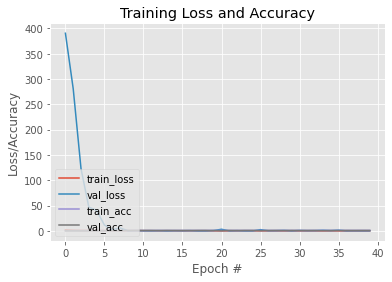

In [19]:
import matplotlib.pyplot as plt
N = 40
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

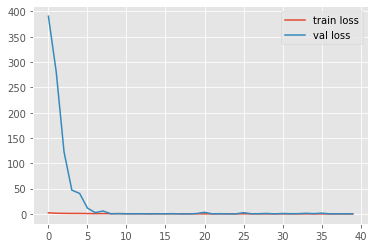

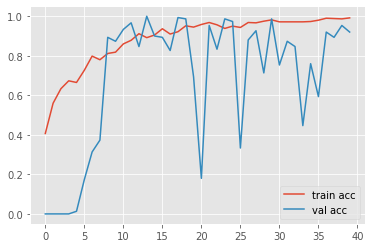

<Figure size 432x288 with 0 Axes>

In [20]:
r=history
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('emorec.h5')